# Human Activity recogniztion using LSTM

# 1.Import libraris

In [1]:
!pip install opencv-python mediapipe msvc-runtime

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2.MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks is not None:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                   mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                   mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # Draw pose landmarks
    if results.pose_landmarks is not None:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))

    # Draw left hand landmarks
    if results.left_hand_landmarks is not None:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=1, circle_radius=2))
        
     # Draw right hand landmarks
    if results.right_hand_landmarks is not None:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=1, circle_radius=2))



In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [ ]:
len(results.left_hand_landmarks.landmark)

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

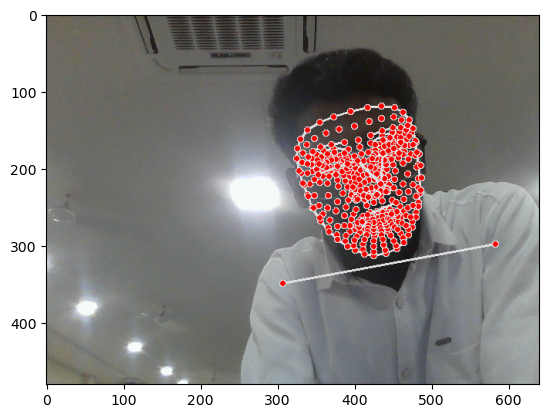

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.Keypointy point value Extract

In [11]:
visibility_value = results.pose_landmarks.landmark[0].visibility

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) 

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.67946875,  0.45960978, -0.90037107, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.67946875,  0.45960978, -0.90037107, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
DATA_PATH = os.path.join('MP_Data')
#Actions
actions = np.array(['hello','thanks','iloveyou'])
#30 videos worth of data
no_sequences = 30
#30 frames
sequence_length = 30
# Folder start
start_folder = 30

In [22]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [23]:
cap = cv2.VideoCapture(0)

#Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Loop through Actions
    for action in actions:
        #Loop through Videos
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
        
                #Read Feed
                ret, frame = cap.read()

                #Make detections
                image,results = mediapipe_detection(frame,holistic)

                #Draw Styled Landmarks
                draw_styled_landmarks(image,results)
                
                #Wait Logic
                if frame_num==0:
                    cv2.putText(image,'Starting Collection',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    cv2.waitKey(2000)
                
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)

                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # Create the directory if it doesn't exist
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)

                np.save(npy_path, keypoints)
                
                #Show to Screen
                cv2.imshow('OpenCV feed', image)

                #Breaking the Feed
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows() 


KeyboardInterrupt: 

In [24]:
cap.release()
cv2.destroyAllWindows()

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [29]:
np.array(sequences).shape

(14, 30, 1662)

In [30]:
np.array(labels).shape

(14,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(14, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(1, 1)

# 7. Build and Train LSTM Neural Network

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense


In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
res = [.7, 0.2, 0.1]

In [41]:
actions[np.argmax(res)]

'hello'

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 13s 127ms/step - loss: 2.7231 - categorical_accuracy: 0.3176
Epoch 2/200
3/3 [==============================] - 0s 124ms/step - loss: 22.8802 - categorical_accuracy: 0.3294
Epoch 3/200
3/3 [==============================] - 0s 123ms/step - loss: 7.0096 - categorical_accuracy: 0.4118
Epoch 4/200
3/3 [==============================] - 0s 128ms/step - loss: 12.8148 - categorical_accuracy: 0.3765
Epoch 5/200
3/3 [==============================] - 0s 125ms/step - loss: 7.1502 - categorical_accuracy: 0.4000
Epoch 6/200
3/3 [==============================] - 0s 127ms/step - loss: 9.4243 - categorical_accuracy: 0.3176
Epoch 7/200
3/3 [==============================] - 0s 128ms/step - loss: 3.2064 - categorical_accuracy: 0.3294
Epoch 8/200
3/3 [==============================] - 0s 127ms/step - loss: 7.6652 - categorical_accuracy: 0.3882
Epoch 9/200
3/3 [==============================] - 0s 127ms/step - loss: 5.0544 - categorical_accuracy: 0.400

3/3 [==============================] - 0s 145ms/step - loss: 45.6698 - categorical_accuracy: 0.3529
Epoch 146/200
3/3 [==============================] - 0s 145ms/step - loss: 28.2797 - categorical_accuracy: 0.3294
Epoch 147/200
3/3 [==============================] - 0s 132ms/step - loss: 41.7219 - categorical_accuracy: 0.3765
Epoch 148/200
3/3 [==============================] - 0s 141ms/step - loss: 42.2867 - categorical_accuracy: 0.4000
Epoch 149/200
3/3 [==============================] - 0s 132ms/step - loss: 32.9999 - categorical_accuracy: 0.3412
Epoch 150/200
3/3 [==============================] - 0s 145ms/step - loss: 26.3146 - categorical_accuracy: 0.3059
Epoch 151/200
3/3 [==============================] - 0s 133ms/step - loss: 44.2220 - categorical_accuracy: 0.2706
Epoch 152/200
3/3 [==============================] - 0s 133ms/step - loss: 26.1965 - categorical_accuracy: 0.2941
Epoch 153/200
3/3 [==============================] - 0s 128ms/step - loss: 17.5237 - categorical_accur

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [132]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [133]:
actions[np.argmax(res[4])]

'thanks'

In [134]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [144]:
model.save('action.h5.keras')

In [146]:
del model

In [148]:
model = Sequential()
model.load_weights('action.h5.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [151]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [152]:
# Assuming you have imported the necessary libraries and defined your model

# Make predictions
yhat = model.predict(X_test)

# Process predictions and true labels
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


1/1 [==============================] - 0s 89ms/step


In [153]:
# yhat = model.predict(X_test)

In [154]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [155]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [1, 1]],

       [[3, 0],
        [2, 0]],

       [[4, 0],
        [1, 0]],

       [[3, 2],
        [0, 0]],

       [[4, 1],
        [0, 0]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [156]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [157]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [164]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [165]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [166]:
len(sequence)

TypeError: object of type 'int' has no len()

In [167]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [168]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [169]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [170]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: index 44999 is out of bounds for axis 0 with size 3

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [66]:
res[np.argmax(res)] > threshold

array([False, False, False])

In [67]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [68]:
model.predict(np.expand_dims(X_test[0], axis=0))

NameError: name 'model' is not defined